In [1]:
import get_dataframe
import pandas as pd
import matplotlib.pyplot as plt
cache_path = "../../data/sensor_cache/"

In [2]:
dual_ids = [782718,
            782719,
            782720,
            782721,
            782722,
            832251,
            832252,
            832253,
            832254,
            832255,
            870139,
            870140,
            870142,
            870143,
            870144,
            870145,
            870146,
            870147,
            912219,
            912220,
            912221,
            912222,
            912223,
            912224,
            912225,
            930426,
            930427,
            930428,
            930429,
            930430,
            930431,
            930432,
            930433,
            930434,
            930435
           ]

Data is pulled down using the sensor ID and a path to where the csv files are to be stored

In [ ]:
for id in dual_ids:
    print("Getting data for Sensor {}".format(id))
    get_dataframe.build_df(id, cache_path)

Requesting page 6


csv files can be opened and loaded into a dataframe using the get_df() function. We can then build a table of PM2.5 values for each sensor, average them per hour and concatenate

In [2]:
all_sensor_hourly = pd.Series()

Text(0.5, 1.0, '782718')

Text(0.5, 1.0, '782719')

Text(0.5, 1.0, '782720')

Text(0.5, 1.0, '782721')

Text(0.5, 1.0, '782722')

Text(0.5, 1.0, '832251')

Text(0.5, 1.0, '832252')

Text(0.5, 1.0, '832253')

Text(0.5, 1.0, '832254')

Text(0.5, 1.0, '832255')

Text(0.5, 1.0, '870139')

Text(0.5, 1.0, '870140')

Text(0.5, 1.0, '870142')

Text(0.5, 1.0, '870143')

Text(0.5, 1.0, '870144')

Text(0.5, 1.0, '870145')

Text(0.5, 1.0, '870146')

Text(0.5, 1.0, '870147')

Text(0.5, 1.0, '912219')

Text(0.5, 1.0, '912220')

Text(0.5, 1.0, '912221')

Text(0.5, 1.0, '912222')

Text(0.5, 1.0, '912223')

Text(0.5, 1.0, '912224')

Text(0.5, 1.0, '912225')

Text(0.5, 1.0, '930426')

Text(0.5, 1.0, '930427')

Text(0.5, 1.0, '930428')

Text(0.5, 1.0, '930430')

Text(0.5, 1.0, '930434')

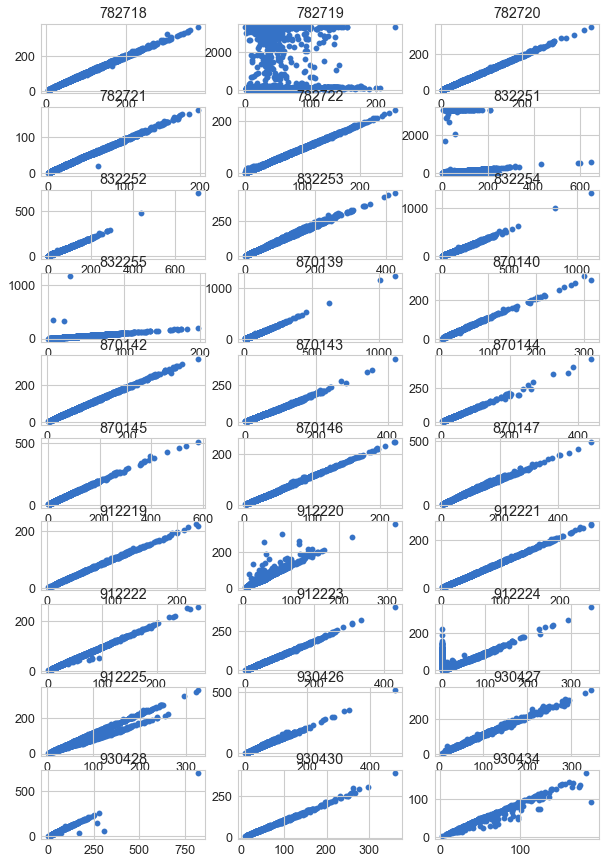

In [18]:
plot = 0
fig, axs = plt.subplots(10, 3, figsize = (10, 15))
axs = axs.flatten()
for id in dual_ids:
    feeds = get_dataframe.get_df(id, cache_path)
    pm_data = get_dataframe.get_pollution(id, feeds)
    sensor_hourly = pm_data.drop("PM10", axis=1)
    sensor_hourly = (sensor_hourly.groupby("sensortype")["PM2.5"]
                     .resample("H", level=1).mean())
    all_sensor_hourly = pd.concat([sensor_hourly, all_sensor_hourly])
    #plt.subplot(10, 3, plot, figsize = (3,1))
    axs[plot].scatter(sensor_hourly["Sensor1"], 
            sensor_hourly["Sensor2"])
    axs[plot].set_title(id)
    plot += 1

We can then plot with just references to the required sensor

C:\Users\ac1dmrx\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


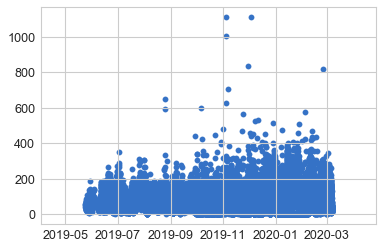

In [6]:
plt.scatter(all_sensor_hourly["Sensor1"].index, all_sensor_hourly["Sensor1"])

As the time field is in datetime format, pandas can index it with given dates. For example to get all results for Dec 2019

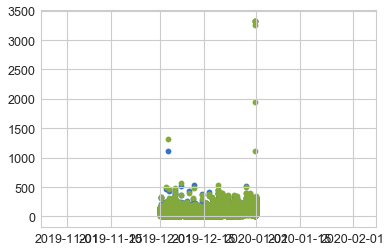

In [8]:
plt.scatter(all_sensor_hourly["Sensor1"]["2019-12"].index, 
            all_sensor_hourly["Sensor1"]["2019-12"])
plt.scatter(all_sensor_hourly["Sensor2"]["2019-12"].index, 
            all_sensor_hourly["Sensor2"]["2019-12"])

We can check the variability of the sensors against each other

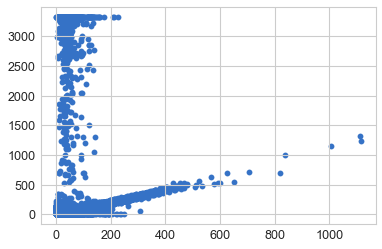

In [9]:
plt.scatter(all_sensor_hourly["Sensor1"], 
            all_sensor_hourly["Sensor2"])

<Figure size 1440x720 with 0 Axes>

(0.8, 1.4)

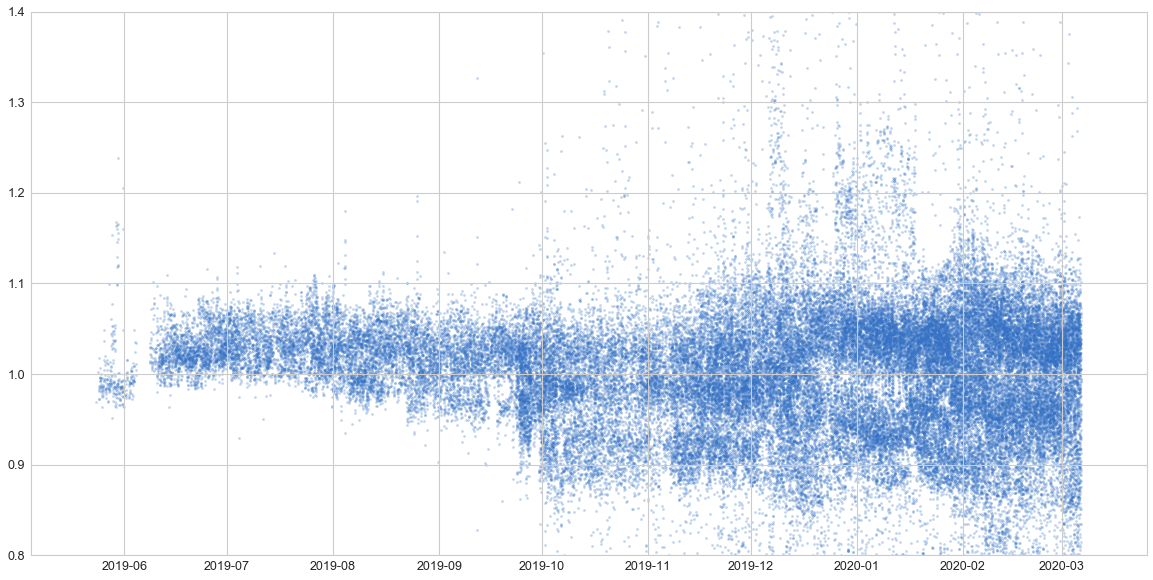

In [10]:
plt.figure(figsize=[20,10])
plt.scatter(all_sensor_hourly['Sensor1'].index,all_sensor_hourly["Sensor1"]/all_sensor_hourly["Sensor2"],6,alpha=0.3)
plt.ylim([0.8,1.4])